# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

### Plot of the 2D function and definition of parameter:

For this exercise it is set for training and valid point
- $N_{x_train} =N_{y_train} = 10000$
- $N_{x_valid} =N_{y_valid} = 800$
- noise $ \sigma = 0.1$



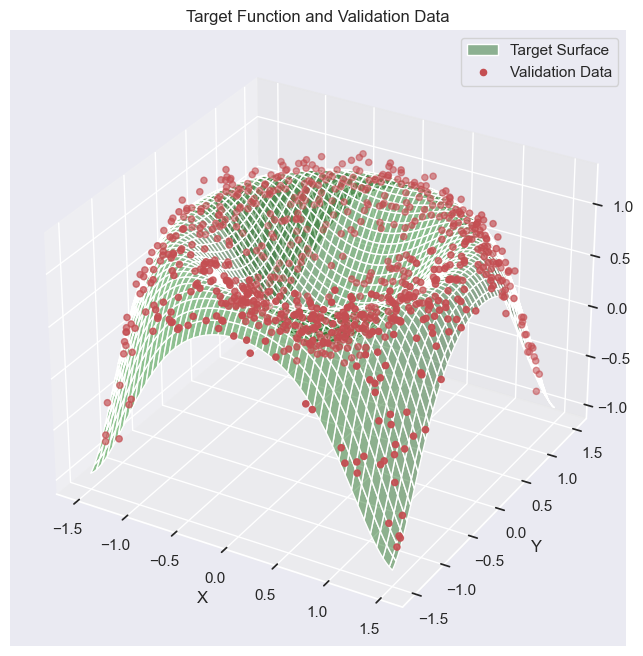

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

sns.set_theme(style = 'darkgrid')

# Define the target parameters for the function f(x) = sin(x^2 + y^2)
np.random.seed(0)  # Set the random seed for reproducibility

# Generate random training and validation data within the range [-1.5, 1.5]
x_train = np.random.uniform(-1.5, 1.5, 10000)
y_train = np.random.uniform(-1.5, 1.5, 10000)
x_valid = np.random.uniform(-1.5, 1.5, 800)
y_valid = np.random.uniform(-1.5, 1.5, 800)

# Combine x and y coordinates into a single array for training and validation
train_data = np.column_stack((x_train, y_train))
valid_data = np.column_stack((x_valid, y_valid))

# Calculate the target values for the training set using the function f(x) = sin(x^2 + y^2)
z_train = np.sin(x_train**2 + y_train**2)

# Calculate the target values for the validation set (ideal target function)
z_target = np.sin(x_valid**2 + y_valid**2)

# Add noise to the validation data
sigma = 0.1  # Standard deviation of the noise
z_valid = np.random.normal(np.sin(x_valid**2 + y_valid**2), sigma)  # Add noise to the z values

# Create a 3D figure for visualization
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D axis

# Create a mesh grid of points for plotting the target surface
x_range = np.linspace(-1.5, 1.5, 100)  # X-axis range
y_range = np.linspace(-1.5, 1.5, 100)  # Y-axis range
x_mesh, y_mesh = np.meshgrid(x_range, y_range)  # Generate the mesh grid
z_mesh = np.sin(x_mesh**2 + y_mesh**2)  # Calculate the z values for the target surface

# Plot the target surface with a green color and transparency
ax.plot_surface(x_mesh, y_mesh, z_mesh, color='green', alpha=0.4, label='Target Surface')

# Plot the validation points with noise in red
ax.scatter(x_valid, y_valid, z_valid, color='r', label='Validation Data')

# Set the labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add a legend and a title to the plot
ax.legend(loc='best')
plt.title('Target Function and Validation Data')

# Show the plot
plt.show()


## Creation of the Neural Network:
For this neural network, the following parameters are set based on the previous exercise:
- Optimizer: `adam`
- Loss function: `MSE` (Mean Squared Error)
- Activation function: `tanh` , try a new one

The network structure should have two input layers, one for \( x \) and one for \( y \). Then, I will try a structure with two hidden layers, one with 64 units and the other with 32 units.

The simulation is set with $N_{epoch}=50$

Below is shown, the result:

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
import matplotlib.pyplot as plt

activate = 'tanh'
# Definizione del modello con Dropout e Adam come ottimizzatore
model = Sequential([
    Input(shape=(2,)),
    Dense(64, activation=activate),
    Dense(32, activation=activate),
    
    Dense(1)
])


model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Training
history = model.fit(x=train_data, y=z_train, 
                    batch_size=32, epochs=50,
                    shuffle=True, 
                    validation_data=(valid_data, z_valid))




Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 0.2182 - mse: 0.2182 - val_loss: 0.1498 - val_mse: 0.1498
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - loss: 0.1518 - mse: 0.1518 - val_loss: 0.1465 - val_mse: 0.1465
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 0.1540 - mse: 0.1540 - val_loss: 0.1484 - val_mse: 0.1484
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1489 - val_mse: 0.1489
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - loss: 0.1548 - mse: 0.1548 - val_loss: 0.1573 - val_mse: 0.1573
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - loss: 0.1532 - mse: 0.1532 - val_loss: 0.1488 - val_mse: 0.1488
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - loss: 0.1548 - mse: 0.1548 - val_loss: 0.1473 - val_mse: 0.1473
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - loss: 0.1545 - mse: 0.1545 - val_loss: 0.1477 - val_mse: 0.1477
Epoch 9/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 


Test loss: 0.0009737193468026817
Test accuracy: 0.0009737193468026817


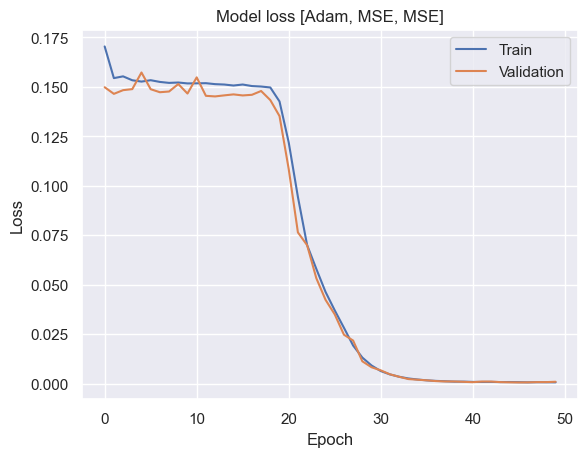

In [27]:
# Valutation
score = model.evaluate(valid_data, z_valid, batch_size=32, verbose=0)
print('\nTest loss:', score[0])
print('Test accuracy:', score[1])

#Plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss [Adam, MSE, MSE]')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

## Prediction:

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step
2000


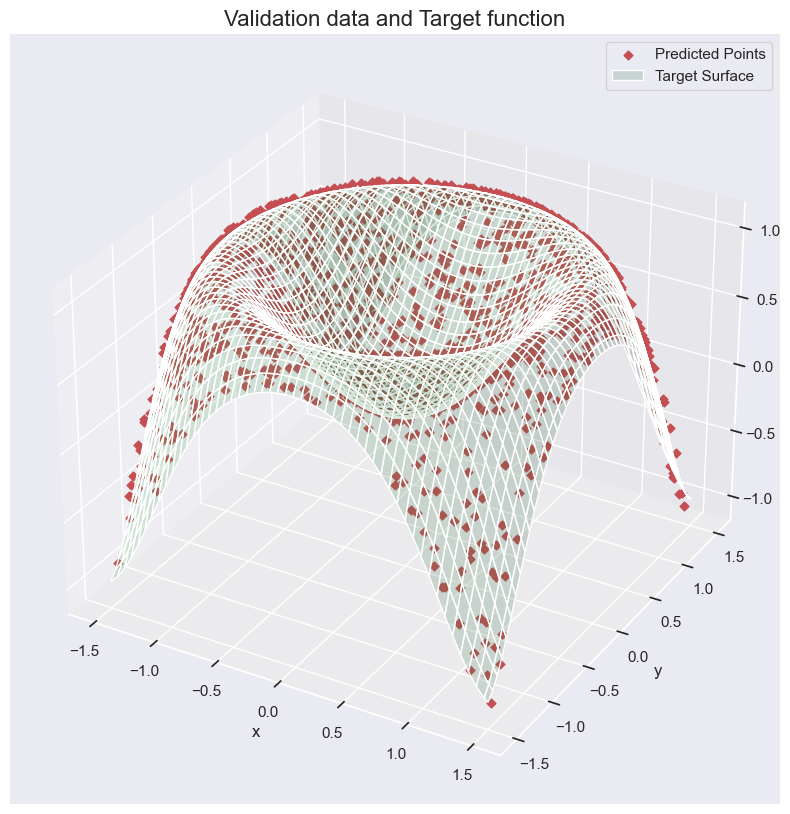

In [46]:
# Create a figure and a 3D subplot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

n_pred =2000

# Generate random numbers for the predicted points (for visualization)
x_predicted = np.random.uniform(-1.5, 1.5, n_pred)
y_predicted = np.random.uniform(-1.5, 1.5, n_pred)

# Stack the x and y coordinates together for prediction
XY_predicted = np.column_stack((x_predicted, y_predicted))

# Predict the z values for the given x and y using the trained model
z_predicted = model.predict(XY_predicted)

# Loop to plot predicted points in the 3D space
print(len(x_predicted))  # Print the length of the predicted x values
for i in range(n_pred):  # Loop through the first 500 predicted points for plotting
    ax.scatter(x_predicted[i], y_predicted[i], z_predicted[i], color='r', marker='D', alpha=1)
ax.scatter(x_predicted[1], y_predicted[1], z_predicted[1], color='r', marker='D', alpha=1, label='Predicted Points')

# Create a mesh grid of points for plotting the target surface
x_range = np.linspace(-1.5, 1.5, 100)  # X-axis range
y_range = np.linspace(-1.5, 1.5, 100)  # Y-axis range
x_mesh, y_mesh = np.meshgrid(x_range, y_range)  # Generate the mesh grid
z_mesh = np.sin(x_mesh**2 + y_mesh**2)  # Calculate the z values for the target surface
# Plot the target surface in blue with transparency
ax.plot_surface(x_mesh, y_mesh, z_mesh, color='g', alpha=0.2, label='Target Surface')

# Label the axes
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.legend()

# Set the title of the plot
plt.title("Validation data and Target function", fontsize=16)



# Display the plot
plt.show()


## Discussion and Observation:
In this simulation and in the neural network built, it is evident that the measured data is compatible with the target surface. The good approximation was also expected from the loss function and accuracy data (which in this case have the same value because they come from the same method).  
It might be interesting to conduct a more in depth analysis on the number of layers and parameters used.
